# Проект: Статистический анализ данных

В рамках данного проекта предстоит проанализировать работу сервиса аренды самокатов GoFast. 

Задача: проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

План работы:
- Изучить информацию о датафреймах;
- Сделать предобработку данных;
- Сделать исследовательский анализ данных;
- Объединить датафреймы;
- Подсчитать выручку;
- Проверить гипотезы;
- Сделать выводы.

Описание данных:

В основных данных есть информация о пользователях, их поездках и подписках.

- Пользователи — users_go.csv

user_id - уникальный идентификатор пользователя

name - имя пользователя

age - возраст

city - город

subscription_type - тип подписки (free, ultra)

- Поездки — rides_go.csv

user_id - уникальный идентификатор пользователя

distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date - дата совершения поездки

- Подписки — subscriptions_go.csv

subscription_type - тип подписки

minute_price - стоимость одной минуты поездки по данной подписке

start_ride_price - стоимость начала поездки

subscription_fee - стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

### Загрузка данных

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


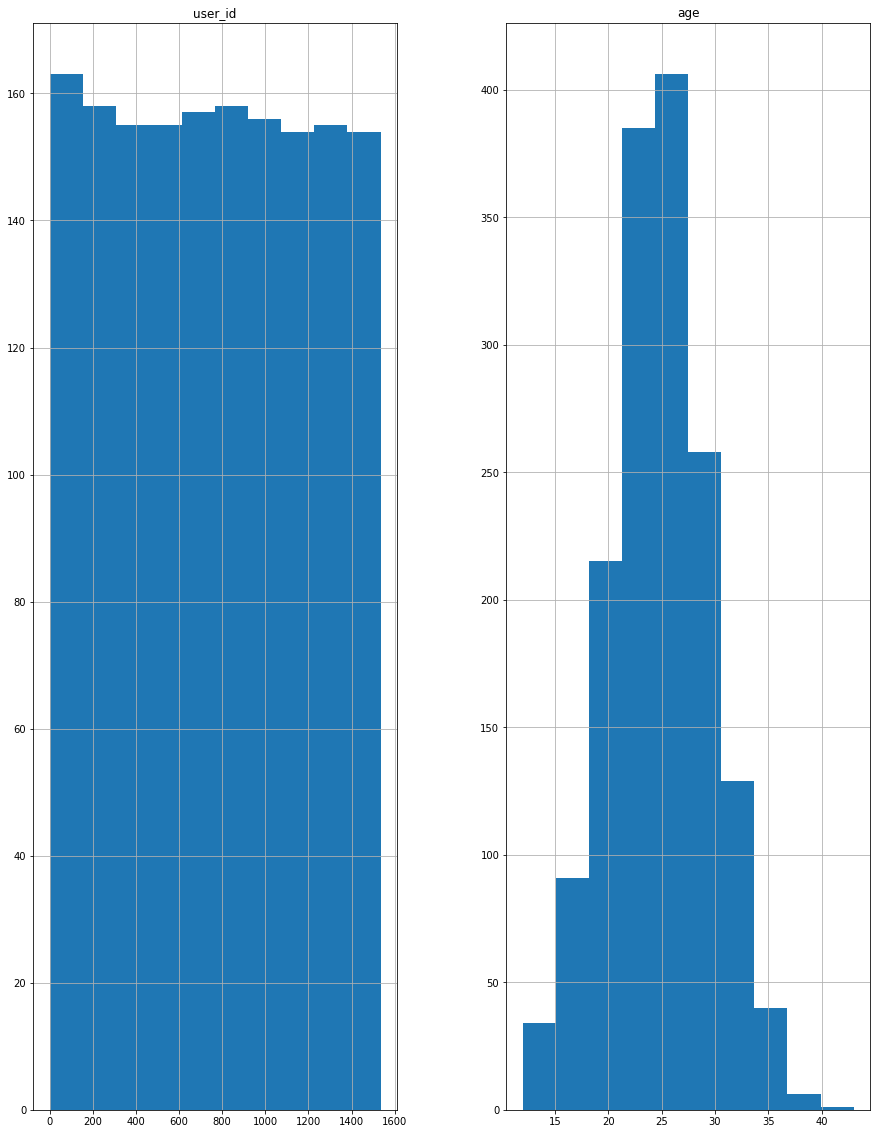

In [2]:
data_user = pd.read_csv('/datasets/users_go.csv')
display(data_user.head())
data_user.info()
data_user.hist(figsize=(15, 20));

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


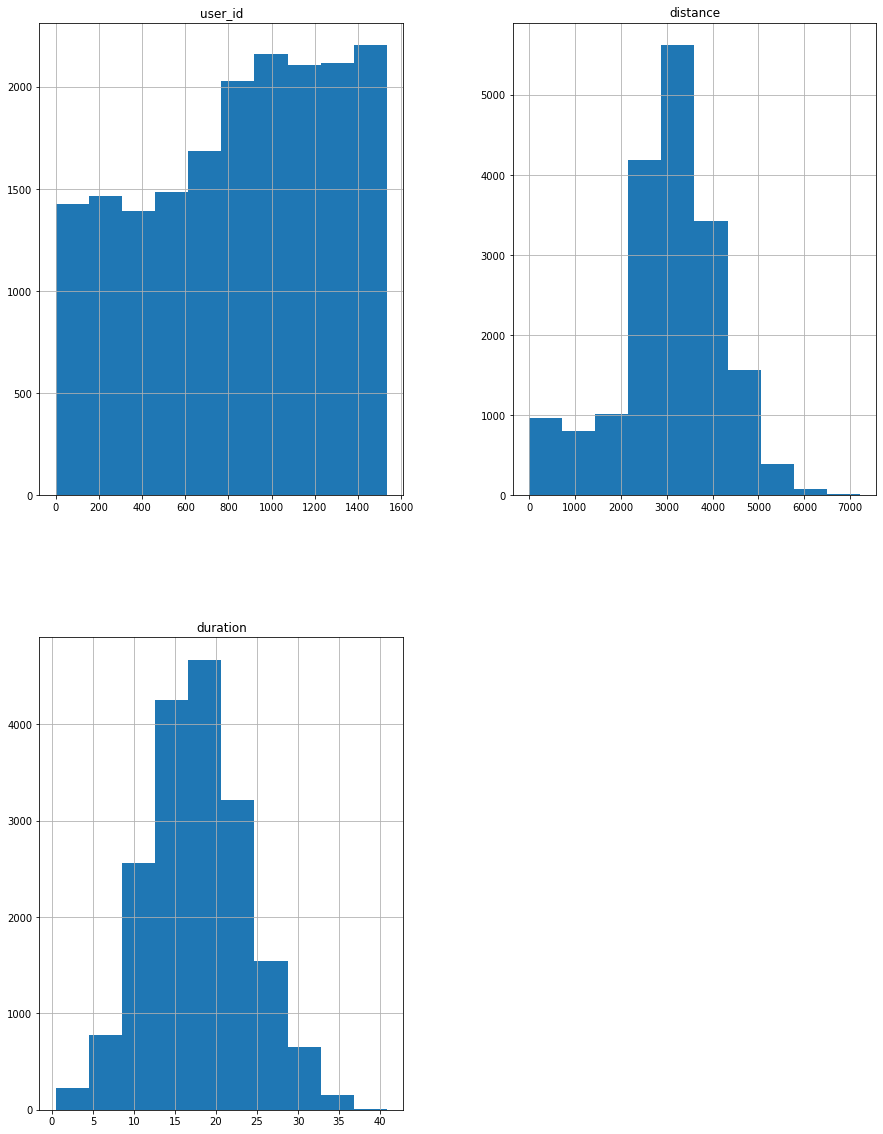

In [3]:
data_rides = pd.read_csv('/datasets/rides_go.csv')
display(data_rides.head())
data_rides.info()
data_rides.hist(figsize=(15, 20));

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


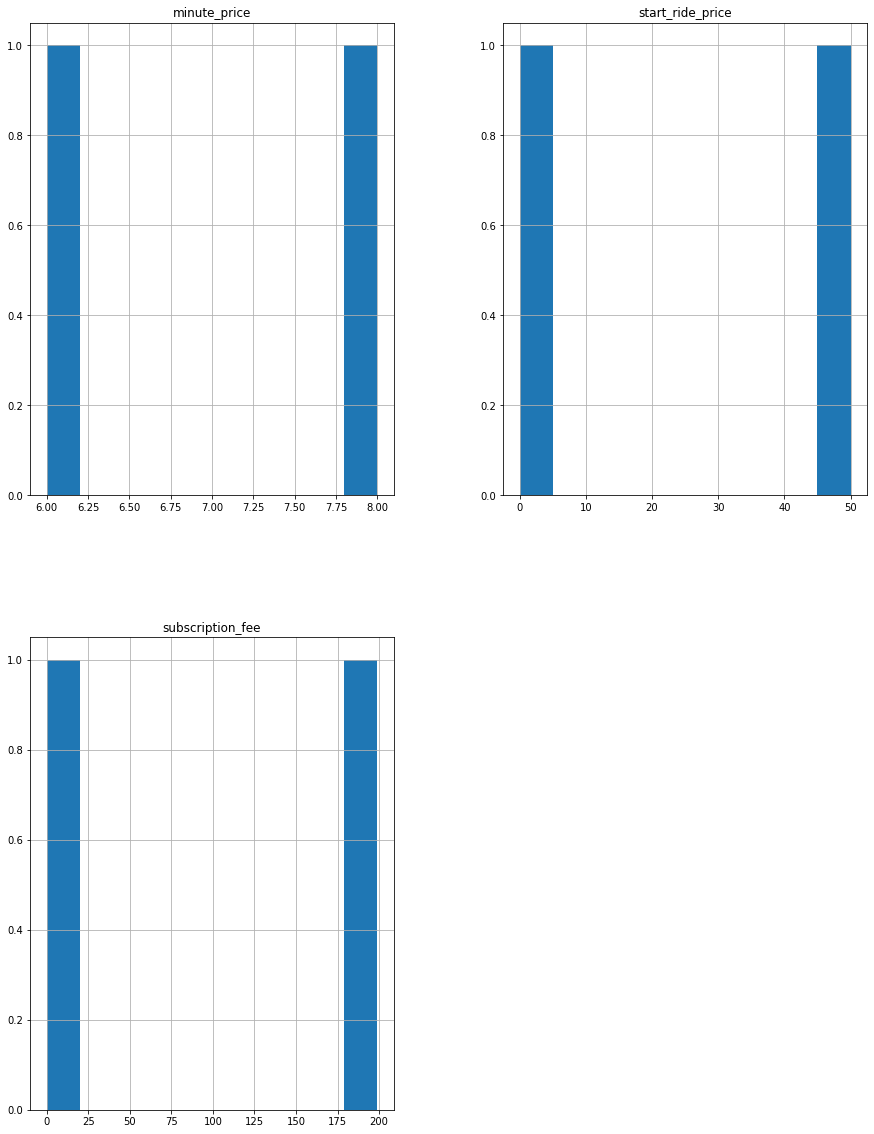

In [4]:
data_subscription = pd.read_csv('/datasets/subscriptions_go.csv')
display(data_subscription.head())
data_subscription.info()
data_subscription.hist(figsize=(15, 20));

Выводы: 
- в датафрейме data_user - 1565 записи, названия столбцов адекватны содержащимся в них данным, в столбцах user_id и age тип данных int, в name, city и subscription_type тип данных object.
- в датафрейме data_rides - 18068 записи, названия столбцов адекватны содержащимся в них данным,  в столбцах user_id тип данных int, в столбцах  distance и duration тип данных float64, в столбце date тип данных object (требуется замена на datetime)
- в датафрейме data_subscription 2 записи, названия столбцов адекватны содержащимся в них данным,у столбца subscription_type тип данных object, у столбцов minute_price, start_ride_price, subscription_fee тип данных int.  

Требуется замена типа данных в столбце date и предобработка данных (проверка наличия пропусков и дубликатов).

### Предобработка данных

In [5]:
# Приведем столбец date к типу даты pandas
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [6]:
# Создаем новый столбец с номером месяца на основе столбца date
data_rides['month'] = data_rides['date'].dt.month

In [7]:
print(data_rides['date'].min(), '-', data_rides['date'].max())

2021-01-01 00:00:00 - 2021-12-30 00:00:00


In [8]:
# Проверяем наличие пропущенных значений и дубликатов в датафреймах
data_user.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [9]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [10]:
data_subscription.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [11]:
data_user.duplicated().sum()

31

In [12]:
data_rides.duplicated().sum()

0

In [13]:
data_subscription.duplicated().sum()

0

In [14]:
# удаляем дубликаты
data_user = data_user.drop_duplicates()

Выводы: были найдены и удалены дубликаты в датафрейме data_user, пропуски в датафремах не были обнаружены, был создан новый столбец 'month' в data_rides, изменен формат столбца с датой в data_rides. Данные готовы к исследовательскому анализу.

### Исследовательский анализ данных

In [15]:
# Опишем и визуализируем информацию о частоте встречаемости городов
data_user['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [16]:
city_rides = data_user.pivot_table(index='city', values='user_id', aggfunc=['count'])
city_rides.columns = ['count']
print(city_rides.sort_values(by='count', ascending=False).head(10))

                count
city                 
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168


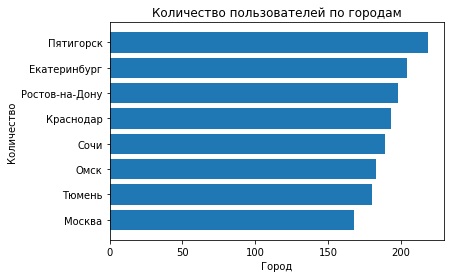

In [17]:
city_rides = city_rides.sort_values(by='count', ascending=True) 
plt.barh(city_rides.index, city_rides['count'])
plt.title('Количество пользователей по городам')
plt.xlabel('Город')
plt.ylabel('Количество')
plt.show()

По количеству пользователей сервиса на первом месте - Пятигорск, на втором - Екатеринбург, на третьем - Ростов-на-Дону.

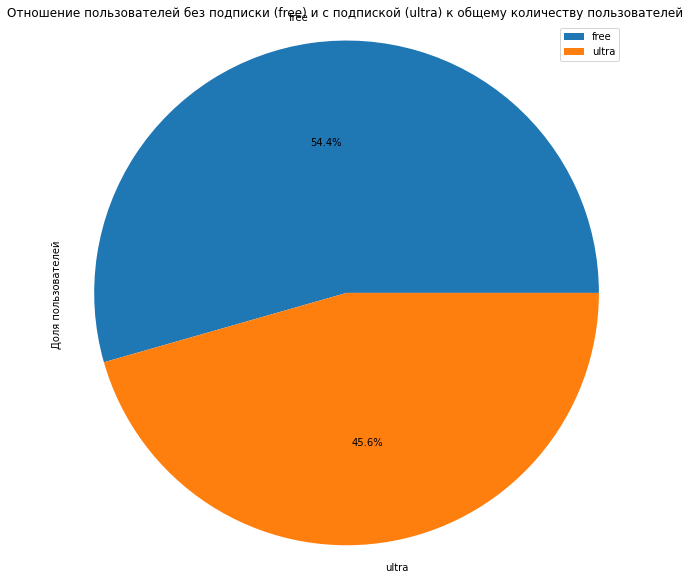

In [18]:
# Опишем и визуализируем информацию о соотношении пользователей с подпиской и без подписки
(
    data_user.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(10,10),  label='Доля пользователей', autopct='%1.1f%%', 
     title='Отношение пользователей без подписки (free) и с подпиской (ultra) к общему количеству пользователей')

)
plt.axis('equal')
plt.show()

Количество пользователей без подписки (54,4%) больше, чем количество пользователей с подпиской (45,6%).

In [19]:
# Опишем и визуализируем информацию о возрасте пользователей
print(data_user['age'].mean())
data_user['age'].describe()

24.903520208604956


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

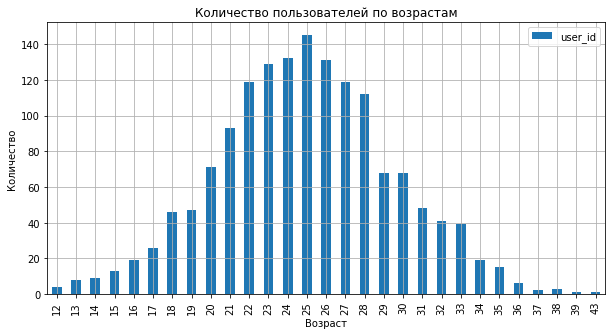

In [20]:
(
    data_user.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Средний возраст - 24.9 лет, что почти совпадает с медианой. Визуализация количества пользователей показывает, что средний возраст пользователя сервиса подчиняется нормальному распределению и находится в диапазоне от 12 до 43 лет.

In [21]:
# Опишем и визуализируем информацию о расстоянии, которое пользователь преодолел за одну поездку
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

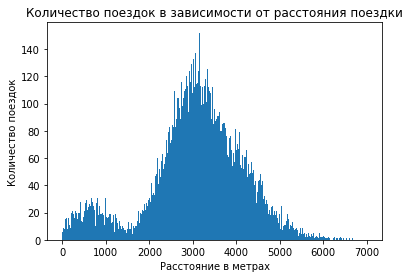

In [22]:
plt.hist(data_rides['distance'], bins=500, range=(1,7000))
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

Визуализация и описание информации о количестве поездок в зависимости от расстояния показывает, что медиана поездок - 3133 м, первый квартиль - 2543 м, третий квартиль - 3776 м. На гистограмме можно заметить два пика: первый совпадает с медианой, а второй пик - 700 м.

In [23]:
# Опишем и визуализируем информацию о продолжительности поездок
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

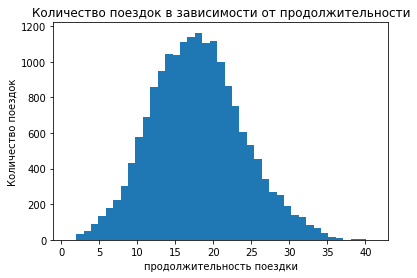

In [24]:
plt.hist(data_rides['duration'], bins=41, range=(1,41))
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

Визуализация количества поездок по их продолжительности указывает, что медиана находится на 18 мин, первый квартиль - 13 мин, третий квартиль - 21 мин. 

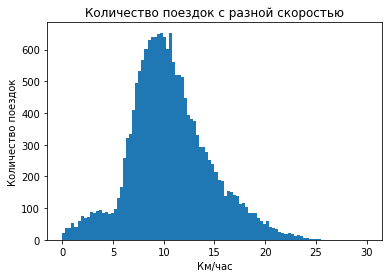

Диапазон скорости: 0.005133121481996673 - 865.3209293518222 км/час


In [25]:
plt.hist(data_rides['distance'] / data_rides['duration'] * 60/1000, bins=100, range=(0,30))
plt.title('Количество поездок с разной скоростью')
plt.xlabel('Км/час')
plt.ylabel('Количество поездок')
plt.show()

print('Диапазон скорости:',(data_rides['distance'] / data_rides['duration']).min()* 60/1000, '-', (data_rides['distance'] / data_rides['duration']).max()* 60/1000, 'км/час')

Выводы: 

Больше всего пользователей сервиса живет в Пятигорске, на втором месте по количеству пользователей - Екатеринбург, на третьем - Ростов-на-Дону. Количество пользователей без подписки (54,4%) больше, чем количество пользователей с подпиской (45,6%). Средний возраст пользователя - 24.9 лет, что почти совпадает с медианой. Визуализация количества пользователей показывает, что средний возраст пользователя сервиса подчиняется нормальному распределению и находится в диапазоне от 12 до 43 лет. Визуализация и описание информации о количестве поездок в зависимости от расстояния показывает, что медиана поездок - 3133 м, первый квартиль - 2543 м, третий квартиль - 3776 м. При этом на гистограмме можно заметить два пика: первый совпадает с медианой, а второй пик - 700 м. Визуализация количества поездок по их продолжительности указывает, что медиана находится на 18 мин, первый квартиль - 13 мин, третий квартиль - 21 мин. 

### Объединение данных

In [26]:
#  Объединим данные о пользователях, поездках и подписках в один датафрейм
data_rides['duration'] = np.ceil(data_rides['duration']) 
data = pd.merge(data_user, data_subscription, on='subscription_type')
data = pd.merge(data_rides, data, on='user_id')
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [27]:
data.duplicated().sum()

0

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [29]:
# Создадим ещё два датафрейма
data_free = data[data['subscription_type'] == 'free']
data_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [30]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [31]:
data_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [32]:
data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   month              6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


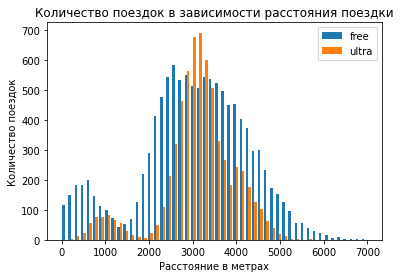

In [33]:
plt.hist([data_free['distance'], data_ultra['distance']], bins=50, range=(1,7000), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

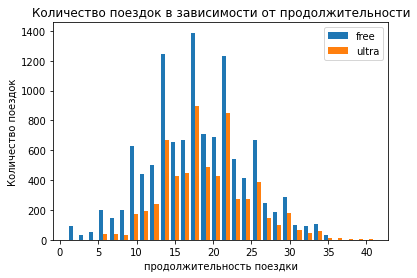

In [34]:
plt.hist([data_free['duration'], data_ultra['duration']], bins=30, range=(1,41), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

In [35]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [36]:
data_free['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [37]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [38]:
data_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Выводы:

Были созданы новые датафреймы, которые позволили проанализировать информацию отдельно для пользователей с подпиской и без нее.
Было проанализировано расстояние поездок: наличие подписки влияет на медианные значения (расстояние без подписки 3114.6 м, а с подпиской - 3148.6 м).У пользователей с подпиской меньший разброс данных. Центр дополнительного пика, который был заметен на предыдушем этапе работы, сдвинут с 500 метров (без подписки) до 1000 (с подпиской).
Было проанализировано время поездки: наличие подписки незначительно влияет на медианные значения (время поезки без подписки - 18 мин, с подпиской 19 мин).

### Подсчёт выручки

In [39]:
# Создаем дополнительный датафрейм 
users_revenue = data.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

users_revenue.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee'
]


users_revenue.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199

In [40]:
# В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь
users_revenue['revenue'] = (
users_revenue['start_ride_price']*users_revenue['count']+
users_revenue['minute_price']*users_revenue['duration']+
users_revenue['subscription_fee'])
users_revenue.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee  revenue  
user_id month                             
1       1                   199    451.0  
        4                   199    241.0  
        8                   199    475.0  
        10                  199    391.0  
        11                  199    535.0

Выводы:

Был создан дополнительный датафрейм и подсчитана помесячная выручка.

### Проверка гипотез

1. Тратят ли пользователи с подпиской больше времени на поездки? 

Нулевая гипотеза - cредняя продолжительность поездок с подпиской и без равна.

Альтернативная гипотеза - средняя продолжительность поездок с подпиской больше продолжительности поездок без подписок.

Требуется двухвыборочный t-тест для независимых выборок. 

In [41]:
results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


Вывод: нулевая гипотеза отвергнута, есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 % (однако, при выполнении шага 4 мы отмечали, что медианное значение для пользователей с подпиской - 18.1 мин, а без - 17.3 (после округления с помощью метода «потолок» библиотеки numpy медианное значение для пользователей с подпиской - 19 мин, а без - 18, но в любом случае между данными для пользователей с подписок и без нет значительных отличий).

2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Нулевая гипотеза - cреднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130.

Альтернативная гипотеза - cреднее расстояние, которое проезжают пользователи с подпиской, превышает 3130.


Требуется одновыборочный t-тест о равенстве среднего генеральной совокупности числу.

In [42]:
distance_value = 3130

alpha = 0.05 

results = st.ttest_1samp(
    data_ultra['distance'], 
    distance_value,
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 


p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Вывод: нулевую гипотезу не удалось отвергнуть и следовательно, есть основания утверждать, что среднее расстояние поездки пользователей с подпиской не превышает оптимальное расстояние в 3130 м (при уровне значимости в 5 %). При выполнении шага 4 мы отмечали, что медианное значение для пользователей с подпиской - 3148 м.

3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Нулевая гипотеза - помесячная выручка от пользователей с подпиской и без подписки равна. 

Альтернативная гипотеза - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Требуется двухвыборочный t-тест для независимых выборок.

In [43]:
results = st.ttest_ind(
    users_revenue.loc[users_revenue['subscription_fee'] > 0, 'revenue'], 
    users_revenue.loc[users_revenue['subscription_fee'] == 0, 'revenue'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Вывод: нулевая гипотеза отвергнута, есть основания утверждать, что средняя месячная выручка от пользователей с подпиской больше средней месячной выручки от пользователей без подписки (при уровне значимости в 5 %).

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: требуется двухвыборочный t-тест для зависимых выборок (будет проверяться гипотеза о равенстве среднего значения генеральной совокупности до и после изменений).

Выводы:
- есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 % (однако, при выполнении шага 4 мы отмечали, что медианное значение для пользователей с подпиской - 19 мин, а без - 18 мин, то есть разница не большая).
- есть основания утверждать, что среднее расстояние поездки пользователей с подпиской не превышает оптимальное расстояние в 3130 м (при уровне значимости в 5 %). При выполнении шага 4 мы отмечали, что медианное значение для пользователей с подпиской - 3148 м.
- есть основания утверждать, что средняя месячная выручка от пользователей с подпиской больше средней месячной выручки от пользователей без подписки (при уровне значимости в 5 %).
- для анализа данных о количестве обращений до обновления и после него требуется двухвыборочный t-тест для зависимых выборок (будет проверяться гипотеза о равенстве среднего значения генеральной совокупности до и после изменений).

### Выводы

В рамках данного проекта данные были предобработаны: была изучена информация о датафреймах, проверено наличие дубликатов, удалены дубликаты из датафрейма data_user, проверено наличие пропусков, создан новый столбец 'month' в data_rides, изменен формат столбца с датой в data_rides. 

Был проведен исследовательский анализ данных: больше всего пользователей сервиса живет в Пятигорске, на втором месте по количеству пользователей - Екатеринбург, на третьем - Ростов-на-Дону. Количество пользователей без подписки (54,4%) больше, чем количество пользователей с подпиской (45,6%). Средний возраст пользователя - 24.9 лет, что почти совпадает с медианой. Визуализация количества пользователей показывает, что средний возраст пользователя сервиса подчиняется нормальному распределению и находится в диапазоне от 12 до 43 лет. Визуализация и описание информации о количестве поездок в зависимости от расстояния показывает, что медиана поездок - 3133 м, первый квартиль - 2543 м, третий квартиль - 3776 м. При этом на гистограмме можно заметить два пика: первый совпадает с медианой, а второй пик - 700 м. Визуализация количества поездок по их продолжительности указывает, что медиана находится на 18 мин, первый квартиль - 13 мин, третий квартиль - 21 мин.

Дополнительно были созданы новые датафреймы, которые позволили проанализировать информацию отдельно для пользователей с подпиской и без нее. Было проанализировано расстояние поездки: наличие подписки влияет на медианные значения (расстояние без подписки 3114.6 м, а с подпиской - 3148.6 м).У пользователей с подпиской меньший разброс данных. Центр дополнительного пика, который был заметен на предыдушем этапе раюоты, сдвинут с 500 метров без подписки) до 1000 (с подпиской). Было проанализировано время поездки: наличие подписки незначительно влияет на медианные значения (время поезки без подписки - 18 мин, с подпиской 19 мин). Был создан дополнительный датафрейм и подсчитана помесячная выручка для дальнейшей проверки гипотез.

Были проверены гипотезы: 
- есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 % (однако, при выполнении шага 4 мы отмечали, что медианное значение для пользователей с подпиской - 19 мин, а без - 18 мин, то есть разница небольшая).
- есть основания утверждать, что среднее расстояние поездки пользователей с подпиской не превышает оптимальное расстояние в 3130 м (при уровне значимости в 5 %). При выполнении шага 4 мы отмечали, что медианное значение для пользователей с подпиской - 3148 м.
- есть основания утверждать, что средняя месячная выручка от пользователей с подпиской больше средней месячной выручки от пользователей без подписки (при уровне значимости в 5 %).
- для анализа данных о количестве обращений до обновления и после него требуется двухвыборочный t-тест для зависимых выборок (будет проверяться гипотеза о равенстве среднего значения генеральной совокупности до и после изменений).

Так как есть основания утверждать, что средняя месячная выручка от пользователей с подпиской больше средней месячной выручки от пользователей без подписки,  а среднее расстояние поездки пользователей с подпиской не превышает оптимальное расстояние в 3130 м, то можно резюмировать, что пользователи с подпиской более выгодны для сервиса.